In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from ggplot import *

In [332]:
fname = 'top_rated_res_user.csv'
df = pd.read_csv(fname)

In [348]:
fname = 'lesser_review_users.csv'
df = pd.read_csv(fname)

{'min_samples': 5, 'eps': 60, 'metric': 'manhattan'}
METHOD : kmeans
Variance Explained : 0.721309952264146 [0.6049616  0.11634835]


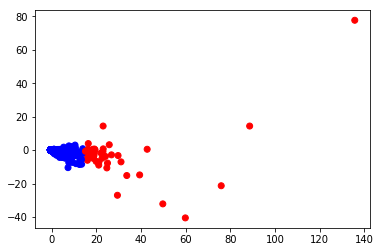

In [349]:
from get_influencers import *
influencer_ids = get_influencer_ids(fname)

In [334]:
df["influencer"] = df.apply(lambda x: 1 if x['id'] in influencer_ids.values else 0, axis=1)

In [335]:
assert(sum(df["influencer"]) == len(influencer_ids), "Influencer column problem")

<ipython-input-335-8facf7377215>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(sum(df["influencer"]) == len(influencer_ids), "Influencer column problem")


In [336]:
df.head()

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,influencer
0,--3WaS23LcIXtxyFULJHTA,Kristie,214,2010-05-02 00:00:00,64,6,4,11,3.91,11,...,0,0,0,5,20,18,18,9,2,0
1,--66hzx80CeVZcrm4AKJtQ,Osama,24,2009-05-29 00:00:00,1,0,0,1,3.38,0,...,0,0,0,0,0,0,0,0,0,0
2,--8ELb8W1afbyP21EZStPg,Mi Sou,20,2011-10-25 00:00:00,0,0,0,0,4.13,0,...,0,0,0,0,0,1,1,0,0,0
3,--G23bgO-XEf0vtTbOwxtg,Matthew,28,2008-01-03 00:00:00,2,0,0,0,3.29,0,...,0,0,0,0,0,0,0,0,0,0
4,--PJ1FuEoTEo-3Cxf_izRg,Quyen,27,2013-11-27 00:00:00,1,0,0,3,3.46,0,...,0,0,0,0,0,0,0,0,1,0


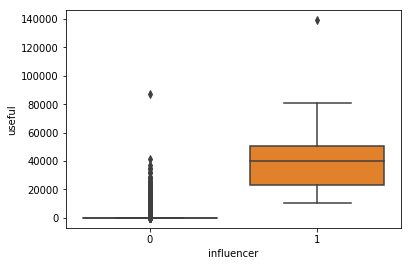

In [337]:
sns.boxplot(x='influencer', y='useful', data=df)

In [338]:
df["useful/review_count"] = df["useful"]/df["review_count"]

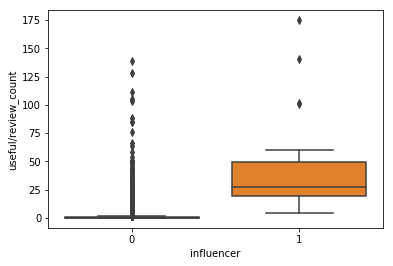

In [339]:
sns.boxplot(x='influencer', y='useful/review_count', data=df)

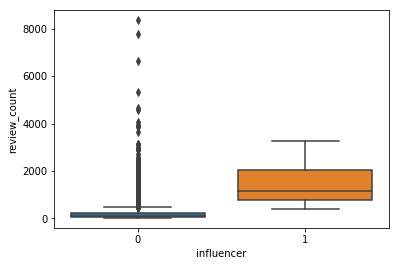

In [340]:
sns.boxplot(x='influencer', y='review_count', data=df)

In [341]:
cols = list(df.columns)
cols.remove("id")
cols.remove("name")
cols.remove("yelping_since")
cols.remove("influencer")

In [342]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_std = df.copy()
df_std[cols] = pd.DataFrame(scaler.fit_transform(df[cols]))

In [343]:
df_long = pd.melt(df_std, id_vars=["id","name", "yelping_since", "influencer"], value_vars=cols)

In [344]:
def plot_var(features):
    f, ax = plt.subplots(figsize=(5*len(features), min(2*len(features), 8)))
    df_plot = df_long[df_long["variable"].isin(features)]
    
    ax = sns.boxplot(x="variable", y="value", data=df_plot, hue="influencer")
    
    plt.tick_params(labelsize=10*len(features))
    #plt.legend(fontsize=50)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[0:2], ["Non-Influencer", "Influencer"], fontsize=5*len(features))
    plt.ylabel('Normalized Feature Values', fontsize=5*len(features))
    plt.xlabel('')
    plt.title('Comparison of Features of Influencers and Non-Influencers', fontsize=5*len(features))
    plt.xticks(rotation=15)

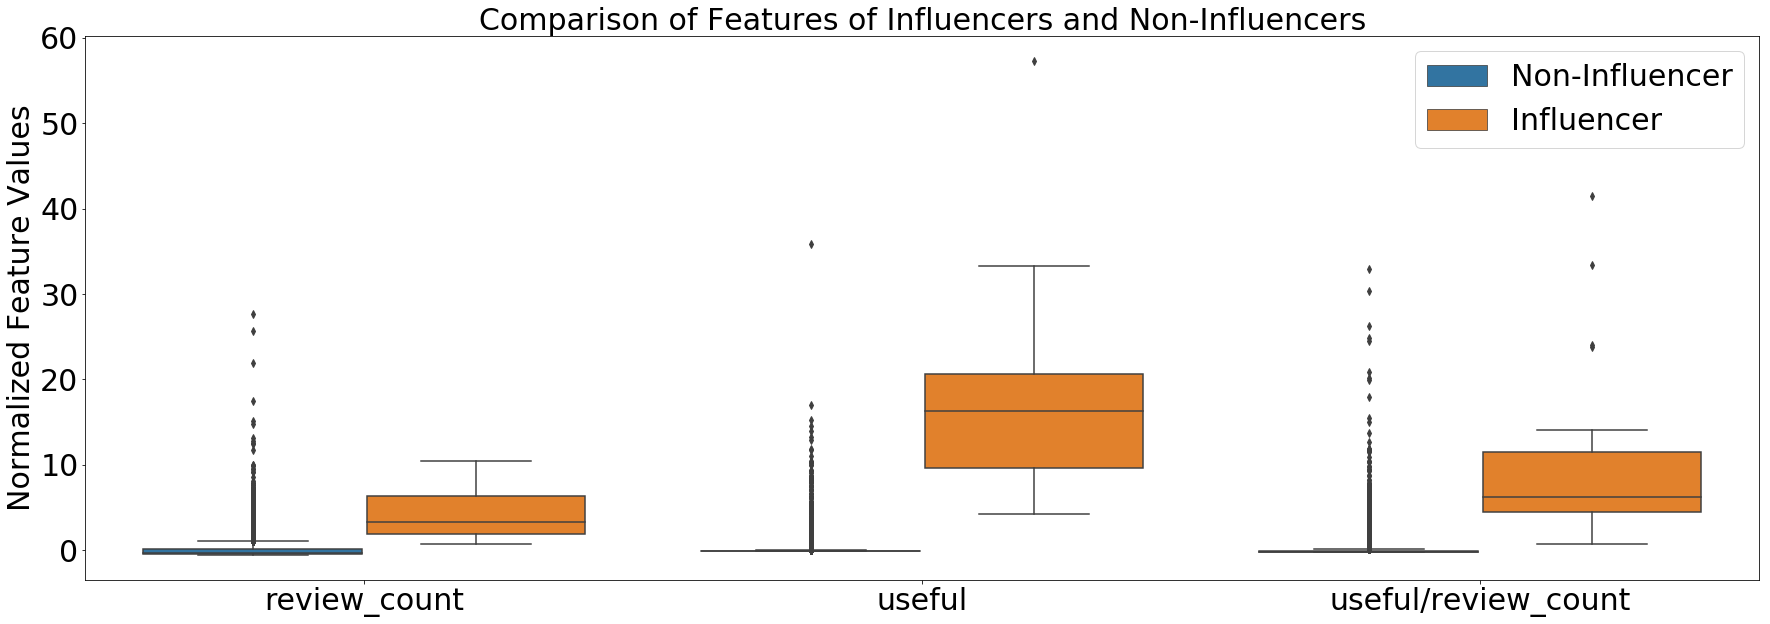

In [345]:
features = ["useful/review_count", "review_count", "useful"]
f, ax = plt.subplots(figsize=(30, 10))
df_plot = df_long[df_long["variable"].isin(features)]

ax = sns.boxplot(x="variable", y="value", data=df_plot, hue="influencer")

plt.tick_params(labelsize=30)
#plt.legend(fontsize=50)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ["Non-Influencer", "Influencer"], fontsize=30)
plt.ylabel('Normalized Feature Values', fontsize=30)
plt.xlabel('')
plt.title('Comparison of Features of Influencers and Non-Influencers', fontsize=30)
plt.xticks(rotation=0)
plt.savefig("images/useful_top")

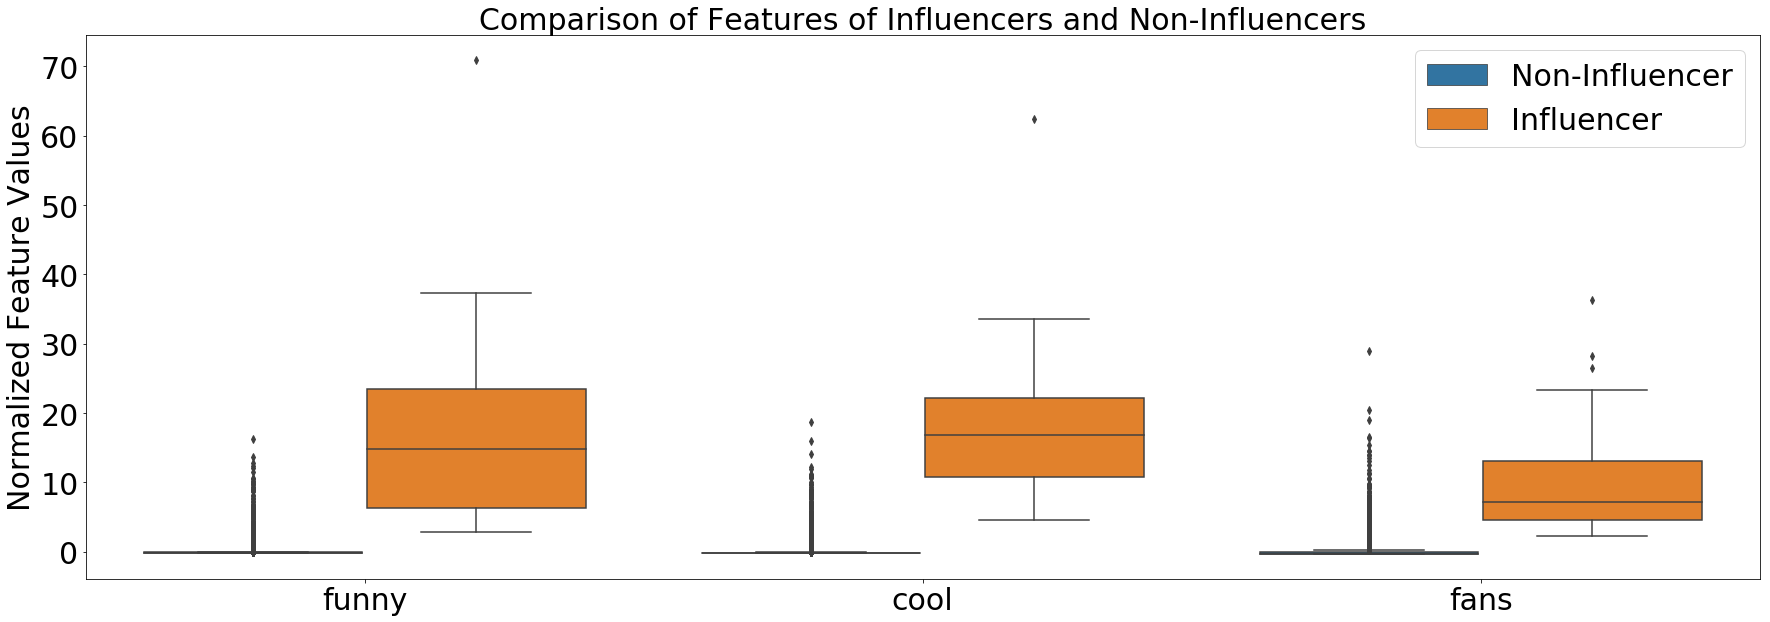

In [346]:
features = ["funny", "cool", "fans"]
f, ax = plt.subplots(figsize=(30, 10))
df_plot = df_long[df_long["variable"].isin(features)]

ax = sns.boxplot(x="variable", y="value", data=df_plot, hue="influencer")

plt.tick_params(labelsize=30)
#plt.legend(fontsize=50)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ["Non-Influencer", "Influencer"], fontsize=30)
plt.ylabel('Normalized Feature Values', fontsize=30)
plt.xlabel('')
plt.title('Comparison of Features of Influencers and Non-Influencers', fontsize=30)
plt.xticks(rotation=0)
plt.savefig("images/funny_top")

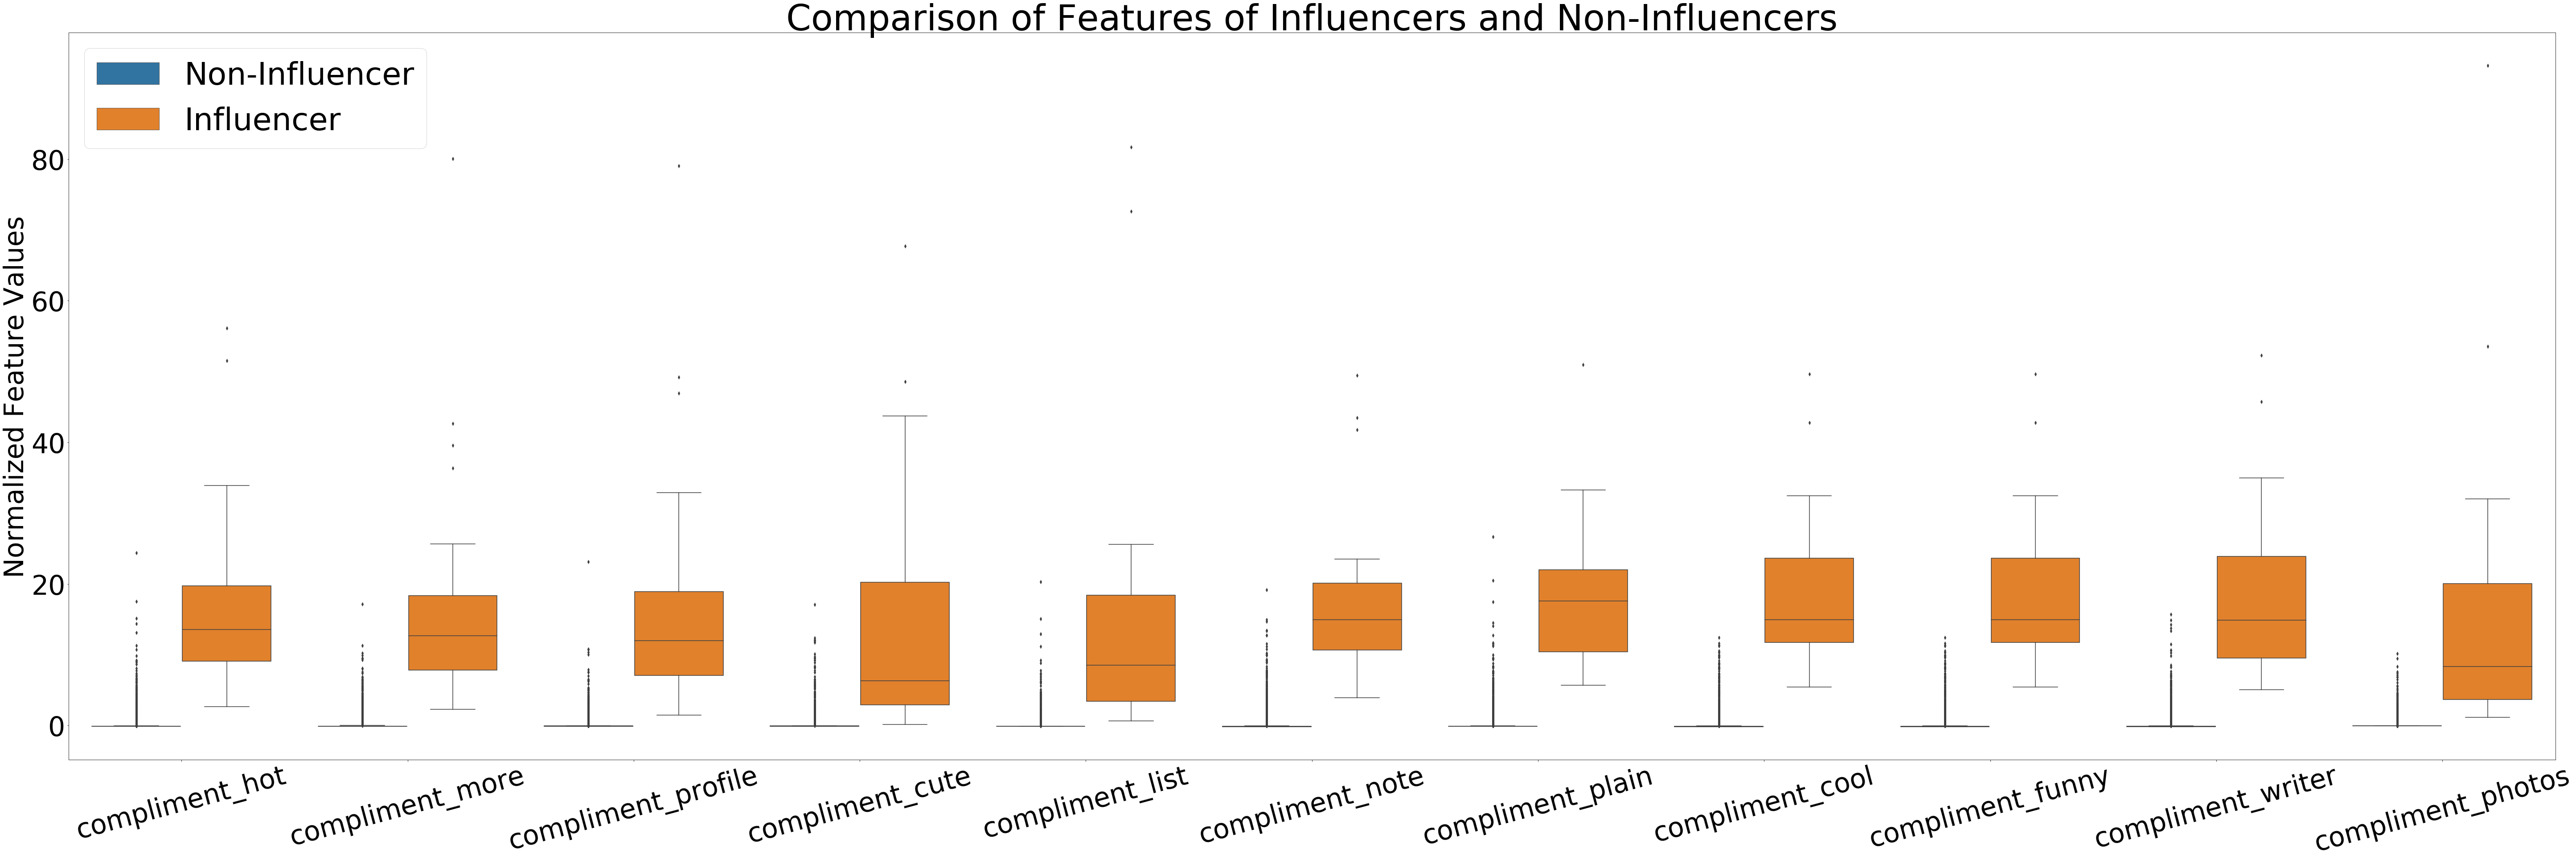

In [347]:
features = list(filter(lambda x: "compli" in x, cols))
f, ax = plt.subplots(figsize=(100, 30))
df_plot = df_long[df_long["variable"].isin(features)]

ax = sns.boxplot(x="variable", y="value", data=df_plot, hue="influencer")

plt.tick_params(labelsize=60)

handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[0:2], ["Non-Influencer", "Influencer"], fontsize=70)
plt.ylabel('Normalized Feature Values', fontsize=60)
plt.xlabel('')
plt.xticks(rotation=15)
plt.title('Comparison of Features of Influencers and Non-Influencers', fontsize=80)
plt.savefig("images/compliment_top")